# Project: Investigate a Dataset - [NO - show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul> 

<a id='intro'></a>
## Introduction

### The Dataset chosen for analysis: NO-show appointments 

>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
 

## Questions for Analysis
### Is there a corellation between showing up for the appointment and:

>Age 

>Type of Disese

>Neighbourhood

>Gender

>Appointmentday

>Scheduledday

>SMS-reminders

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from datetime import datetime

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

In [144]:
df = pd.read_csv('noshowappointm.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [145]:
#improving the shape of columns names for easier manipulation.
df.rename(columns=lambda x: x.strip().lower().replace(' ','_'), inplace=True)
df.rename(columns={'hipertension':'hypertension', 'handcap':'handicap'}, inplace=True)

In [146]:
#checking...
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       110527 non-null  float64
 1   appointmentid   110527 non-null  int64  
 2   gender          110527 non-null  object 
 3   scheduledday    110527 non-null  object 
 4   appointmentday  110527 non-null  object 
 5   age             110527 non-null  int64  
 6   neighbourhood   110527 non-null  object 
 7   scholarship     110527 non-null  int64  
 8   hypertension    110527 non-null  int64  
 9   diabetes        110527 non-null  int64  
 10  alcoholism      110527 non-null  int64  
 11  handicap        110527 non-null  int64  
 12  sms_received    110527 non-null  int64  
 13  no-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [148]:
df.describe()

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning
#### The Data Structure:
>Before cleaning the data, we have investigated the structure of our dataset and if there is any null values, missing values,  inconsistency or inadequate datatype, There were also unecessary columns with missing data, inadequate datatypes.

###  The Cleaning Process:
>First, I removed columns that are not necessary for my analysis 'patientid', 'appointmentid' to improve database redability.

>I adjusted  scheduledday , appointmentday from string to date datatype and improved its format.

>I dropped the null values

>I removed the duplicated rows

>Replacing zero with NAN in 'age' column.

In [149]:
df.isnull().sum()

patientid         0
appointmentid     0
gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hypertension      0
diabetes          0
alcoholism        0
handicap          0
sms_received      0
no-show           0
dtype: int64

In [150]:
df.duplicated().sum()

0

In [151]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'], format='%Y-%m-%dT%H:%M:%SZ')

In [152]:
df['appointmentday'] = pd.to_datetime(df['appointmentday'], format='%Y-%m-%dT%H:%M:%SZ')

In [153]:
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   patientid       110527 non-null  float64       
 1   appointmentid   110527 non-null  int64         
 2   gender          110527 non-null  object        
 3   scheduledday    110527 non-null  datetime64[ns]
 4   appointmentday  110527 non-null  datetime64[ns]
 5   age             110527 non-null  int64         
 6   neighbourhood   110527 non-null  object        
 7   scholarship     110527 non-null  int64         
 8   hypertension    110527 non-null  int64         
 9   diabetes        110527 non-null  int64         
 10  alcoholism      110527 non-null  int64         
 11  handicap        110527 non-null  int64         
 12  sms_received    110527 non-null  int64         
 13  no-show         110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

In [154]:
#dropping useless columns.
df.drop(['patientid', 'appointmentid'],axis=1, inplace=True)

In [155]:
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [156]:
#imporoving the structure of data for easier analysis
df['no-show'].replace({'No':0, 'Yes':1}, inplace=True)

In [157]:
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0


In [158]:
df.duplicated().sum()

635

In [159]:
df.drop_duplicates(inplace=True)

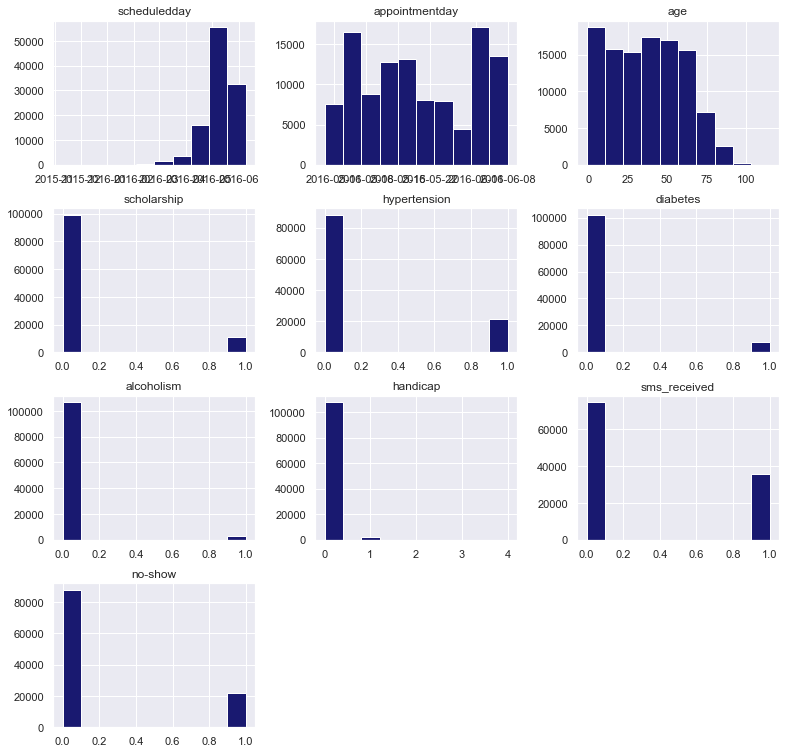

In [160]:
#having an overview of the data
df.hist(figsize=(13,13),
        color = 'midnightblue');
        

In [20]:
#checking if there is any irrational data
df[df['age'] <= 0]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
59,F,2016-04-29 08:08:43,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,0
63,M,2016-04-27 10:46:12,2016-04-29,0,SÃO BENEDITO,0,0,0,0,0,0,0
64,M,2016-04-25 13:28:21,2016-04-29,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,0
65,M,2016-04-27 10:48:50,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,0
67,F,2016-04-29 08:53:02,2016-04-29,0,NOVA PALESTINA,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
110345,F,2016-05-16 12:30:58,2016-06-01,0,RESISTÊNCIA,0,0,0,0,0,0,0
110346,M,2016-06-06 14:22:34,2016-06-08,0,RESISTÊNCIA,0,0,0,0,0,0,0
110454,F,2016-06-03 15:18:44,2016-06-03,0,RESISTÊNCIA,0,0,0,0,0,0,0
110460,F,2016-06-03 08:56:51,2016-06-03,0,RESISTÊNCIA,0,0,0,0,0,0,0


In [21]:
#replacing 0 values with NAN values
df['age'].replace(0, np.NAN, inplace=True)

In [22]:
df.dropna(inplace= True)

In [23]:
#checking..
df[df['age'] <= 0]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
99832,F,2016-06-06 08:58:13,2016-06-06,-1.0,ROMÃO,0,0,0,0,0,0,0


In [24]:
df.drop([99832], axis = 0, inplace=True)

In [25]:
#checking..
df[df['age'] <= 0]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106361 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   gender          106361 non-null  object        
 1   scheduledday    106361 non-null  datetime64[ns]
 2   appointmentday  106361 non-null  datetime64[ns]
 3   age             106361 non-null  float64       
 4   neighbourhood   106361 non-null  object        
 5   scholarship     106361 non-null  int64         
 6   hypertension    106361 non-null  int64         
 7   diabetes        106361 non-null  int64         
 8   alcoholism      106361 non-null  int64         
 9   handicap        106361 non-null  int64         
 10  sms_received    106361 non-null  int64         
 11  no-show         106361 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(7), object(2)
memory usage: 10.5+ MB


In [27]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,F,2016-04-29 18:38:08,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29 16:08:27,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29 16:19:04,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29 17:29:31,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29 16:07:23,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,0


# Exploratory Data Analysis
## Research Question 1: Is there a relationship between the following personal parts of information and no-shows?


### Creating two dataframes for both the people who showed up and not 

In [28]:
showed = df[df['no-show'] == 0]
no_show = df[df['no-show'] == 1]

In [29]:
showed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84899 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   gender          84899 non-null  object        
 1   scheduledday    84899 non-null  datetime64[ns]
 2   appointmentday  84899 non-null  datetime64[ns]
 3   age             84899 non-null  float64       
 4   neighbourhood   84899 non-null  object        
 5   scholarship     84899 non-null  int64         
 6   hypertension    84899 non-null  int64         
 7   diabetes        84899 non-null  int64         
 8   alcoholism      84899 non-null  int64         
 9   handicap        84899 non-null  int64         
 10  sms_received    84899 non-null  int64         
 11  no-show         84899 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(7), object(2)
memory usage: 8.4+ MB


In [30]:
no_show.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21462 entries, 6 to 110516
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   gender          21462 non-null  object        
 1   scheduledday    21462 non-null  datetime64[ns]
 2   appointmentday  21462 non-null  datetime64[ns]
 3   age             21462 non-null  float64       
 4   neighbourhood   21462 non-null  object        
 5   scholarship     21462 non-null  int64         
 6   hypertension    21462 non-null  int64         
 7   diabetes        21462 non-null  int64         
 8   alcoholism      21462 non-null  int64         
 9   handicap        21462 non-null  int64         
 10  sms_received    21462 non-null  int64         
 11  no-show         21462 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(7), object(2)
memory usage: 2.1+ MB


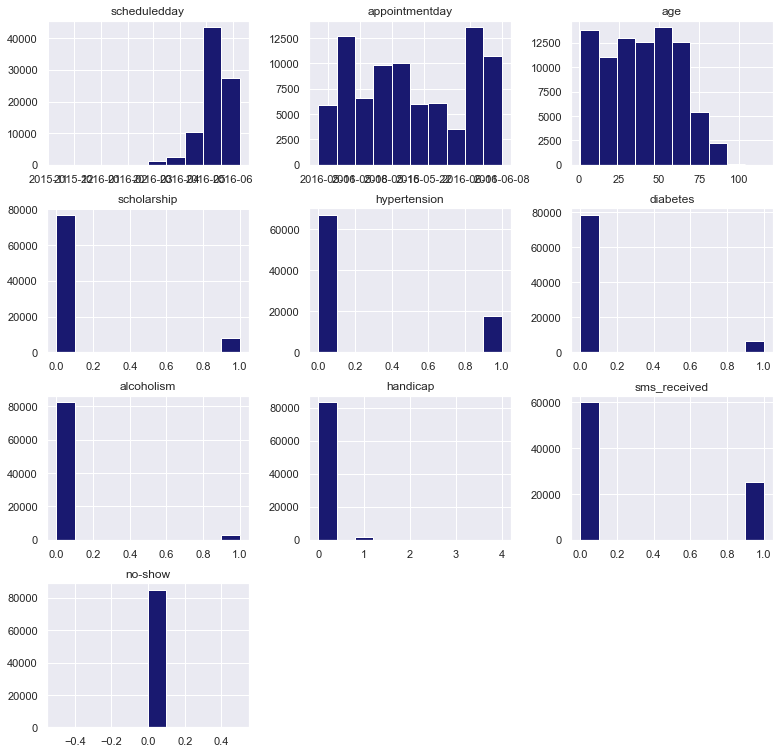

In [31]:
#overview of the showed dataframe.
showed.hist(figsize=(13,13),
            color = 'midnightblue');

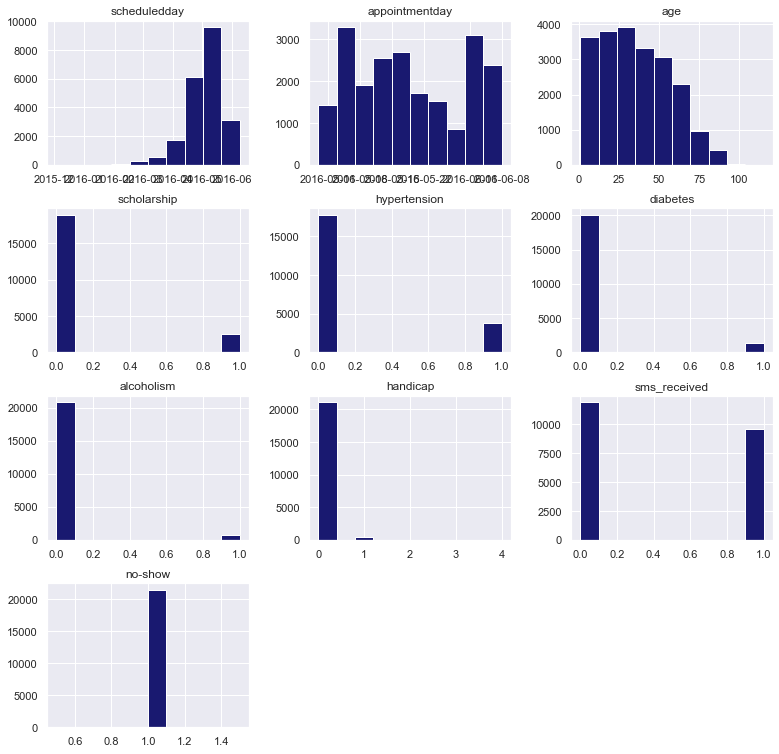

In [32]:
#overview of the no_show dataframe
no_show.hist(figsize=(13,13),
            color = 'midnightblue');

# AGE

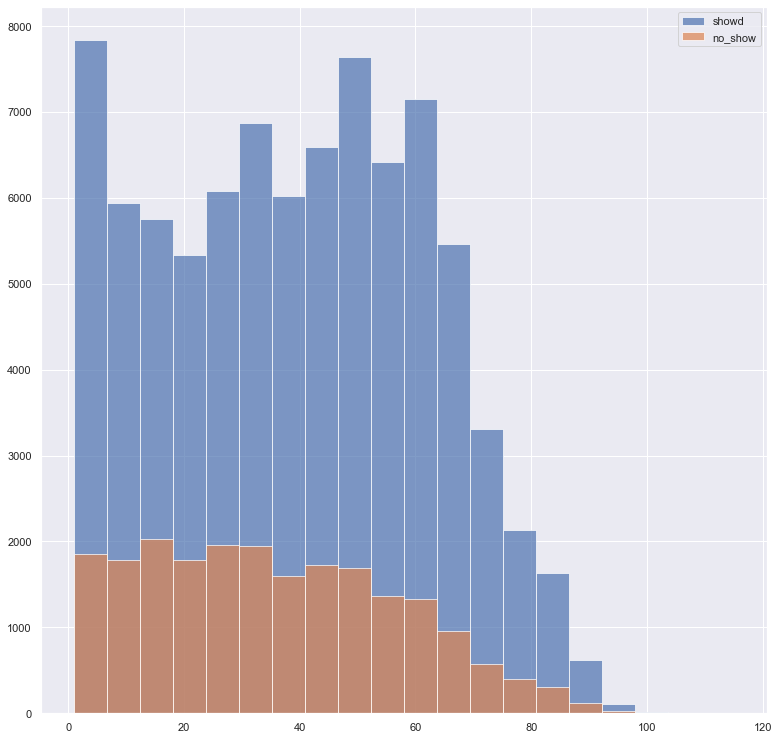

In [161]:
plt.figure(figsize=(13,13))
showed['age'].hist(alpha = 0.7, bins =20, label = 'showd')
no_show['age'].hist(alpha = 0.7, bins =20, label = 'no_show')
plt.legend()
plt.show();

In [162]:
mean_age_showed = showed['age'].mean()
mean_age_no_show = no_show['age'].mean()

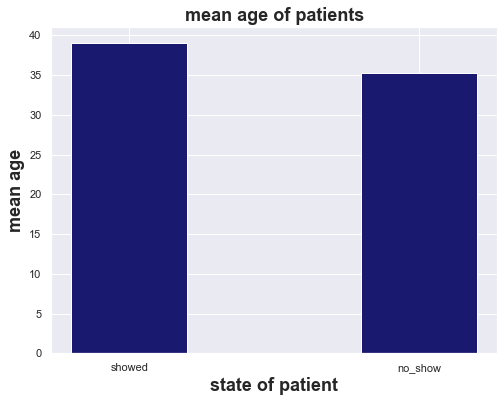

In [163]:
plt.figure(figsize=(8,6))
plt.bar(['showed', 'no_show'], [mean_age_showed, mean_age_no_show ], width = 0.4, color = 'midnightblue')
plt.title('mean age of patients', fontsize = 18, weight = 'bold')
plt.xlabel('state of patient', fontsize = 18, weight = 'bold')
plt.ylabel('mean age', fontsize = 18, weight = 'bold')
plt.show();

>It seems that there is no such difference in age between both the people who showed up and did not show up, they both follow the same pattern of behaviour, but people who attended the appointment are kind of older.

# Diseases
## Hypertension

In [36]:
Hyper_showed = showed['hypertension'].mean()
Hyper_no_show = no_show['hypertension'].mean()

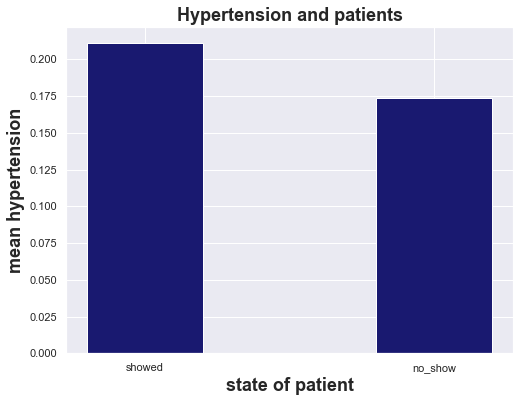

In [37]:
plt.figure(figsize=(8,6))
plt.bar(['showed', 'no_show'], [Hyper_showed, Hyper_no_show], width = 0.4, color = 'midnightblue')
plt.title('Hypertension and patients', fontsize = 18, weight = 'bold')
plt.xlabel('state of patient', fontsize = 18, weight = 'bold')
plt.ylabel('mean hypertension', fontsize = 18, weight = 'bold')
plt.show();

> Patients who had hypertension are more likely to show up for the appointment.

## Diabetes 

In [164]:
diabetes_showed = showed['diabetes'].mean()
diabetes_no_show = no_show['diabetes'].mean()

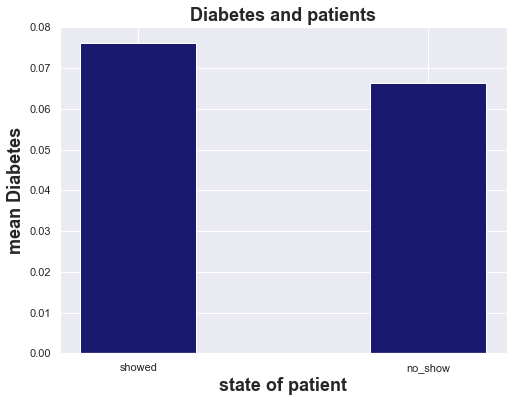

In [165]:
plt.figure(figsize=(8,6))
plt.bar(['showed', 'no_show'], [diabetes_showed, diabetes_no_show], width = 0.4, color = 'midnightblue')
plt.title('Diabetes and patients', fontsize = 18, weight = 'bold')
plt.xlabel('state of patient', fontsize = 18, weight = 'bold')
plt.ylabel('mean Diabetes', fontsize = 18, weight = 'bold')
plt.show();

> Patients who had diabetes are more likely to show up for the appointment.

## Alcoholism

In [166]:
alcohol_showed = showed['alcoholism'].mean()
alcohol_no_show = no_show['alcoholism'].mean()

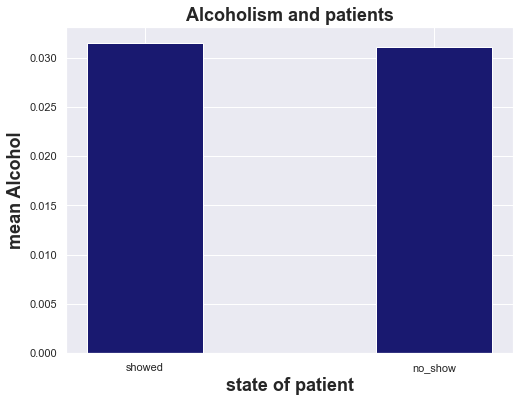

In [167]:
plt.figure(figsize=(8,6))
plt.bar(['showed', 'no_show'], [alcohol_showed, alcohol_no_show], width = 0.4, color = 'midnightblue')
plt.title('Alcoholism and patients', fontsize = 18, weight = 'bold')
plt.xlabel('state of patient', fontsize = 18, weight = 'bold')
plt.ylabel('mean Alcohol', fontsize = 18, weight = 'bold')
plt.show();

>Patients who had alcoholism seem to have the same pattern of behaviour, no significane difference.

# Handicap

In [168]:
handicap_showed = showed['handicap'].mean()
handicap_no_show = no_show['handicap'].mean()

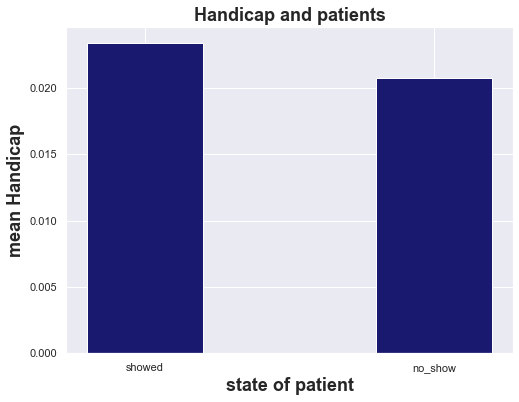

In [169]:
plt.figure(figsize=(8,6))
plt.bar(['showed', 'no_show'], [handicap_showed, handicap_no_show], width = 0.4, color = 'midnightblue')
plt.title('Handicap and patients', fontsize = 18, weight = 'bold')
plt.xlabel('state of patient', fontsize = 18, weight = 'bold')
plt.ylabel('mean Handicap', fontsize = 18, weight = 'bold')
plt.show();

> Patients who are handicapped are more likely to show up for the appointment.

# Neighbourhood

## Showed_up neighbourhood

In [170]:
area = showed['neighbourhood'].value_counts().head(15)

In [171]:
area.sort_values(ascending=False, inplace=True)

In [172]:
area

JARDIM CAMBURI       6092
MARIA ORTIZ          4368
RESISTÊNCIA          3337
JARDIM DA PENHA      3221
CENTRO               2574
SANTA MARTHA         2531
ITARARÉ              2491
TABUAZEIRO           2463
SANTO ANTÔNIO        2191
BONFIM               2153
JESUS DE NAZARETH    2043
JABOUR               1962
SANTO ANDRÉ          1961
CARATOÍRA            1887
SÃO PEDRO            1838
Name: neighbourhood, dtype: int64

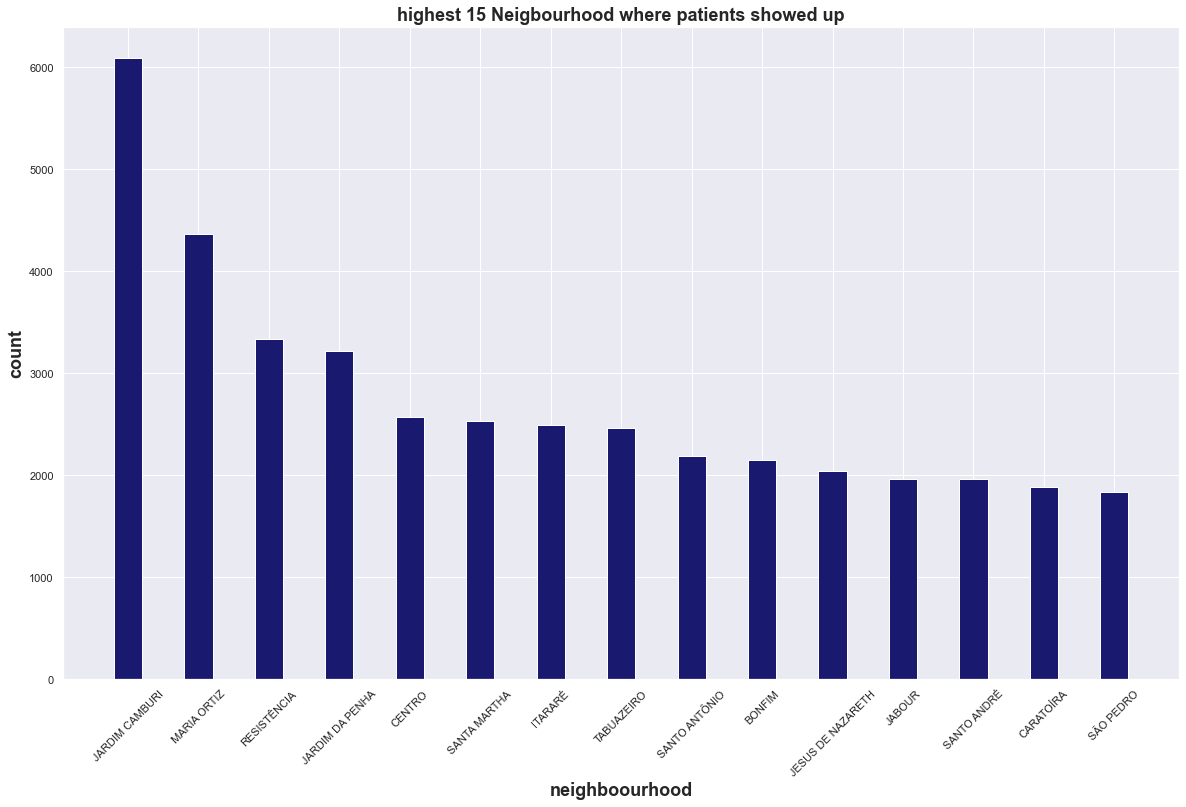

In [174]:
plt.figure(figsize=(20,12))
plt.bar(area.index, area, width = 0.4, color = 'midnightblue')
plt.title('highest 15 Neigbourhood where patients showed up', fontsize = 18, weight = 'bold')
plt.xlabel('neighboourhood', fontsize = 18, weight = 'bold')
plt.ylabel('count', fontsize = 18, weight = 'bold')
plt.xticks(rotation = 45)
plt.show();

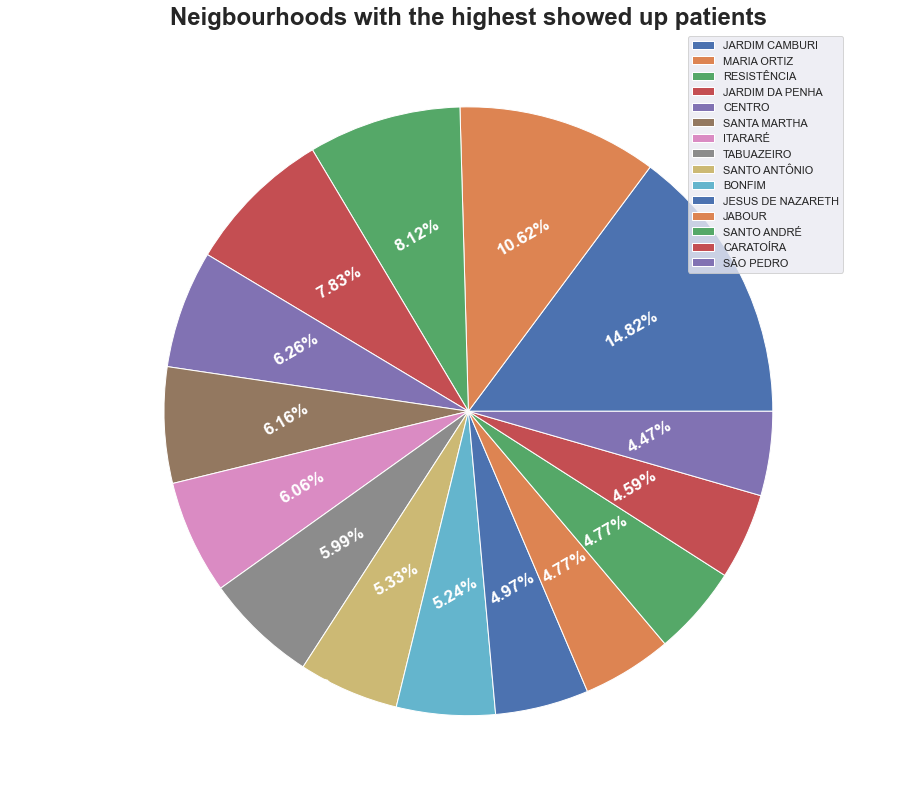

In [175]:
plt.figure(figsize=(20,14))
plt.pie(area, labels=area.index, autopct= '%.2f%%',
        textprops= {'size':'x-large',
                    'fontweight': 'bold',
                    'rotation': "30",
                    'color':'w'})
plt.title('Neigbourhoods with the highest showed up patients', fontsize = 24, fontweight = 'bold')     
plt.legend()
plt.show()

# NO-show neighbourhood

In [176]:
hood = no_show['neighbourhood'].value_counts().head(15)

In [177]:
hood.sort_values(ascending=False, inplace=True)

In [51]:
hood

JARDIM CAMBURI       1396
MARIA ORTIZ          1194
ITARARÉ               877
RESISTÊNCIA           854
CENTRO                684
JESUS DE NAZARETH     675
JARDIM DA PENHA       627
CARATOÍRA             578
TABUAZEIRO            547
BONFIM                535
ILHA DO PRÍNCIPE      525
SÃO PEDRO             491
ANDORINHAS            485
SANTO ANDRÉ           482
SANTA MARTHA          482
Name: neighbourhood, dtype: int64

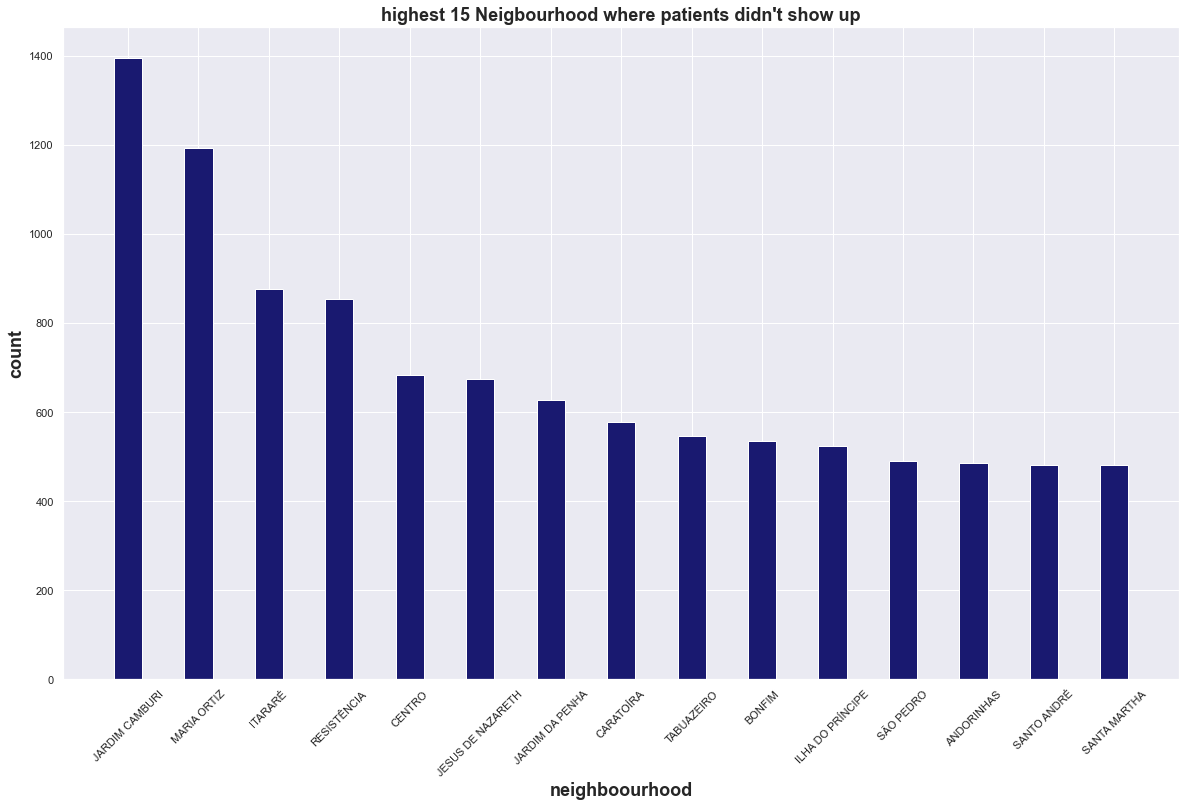

In [178]:
plt.figure(figsize=(20,12))
plt.bar(hood.index, hood, width = 0.4, color = 'midnightblue')
plt.title('highest 15 Neigbourhood where patients didn\'t show up', fontsize = 18, weight = 'bold')
plt.xlabel('neighboourhood', fontsize = 18, weight = 'bold')
plt.ylabel('count', fontsize = 18, weight = 'bold')
plt.xticks(rotation = 45)
plt.show();

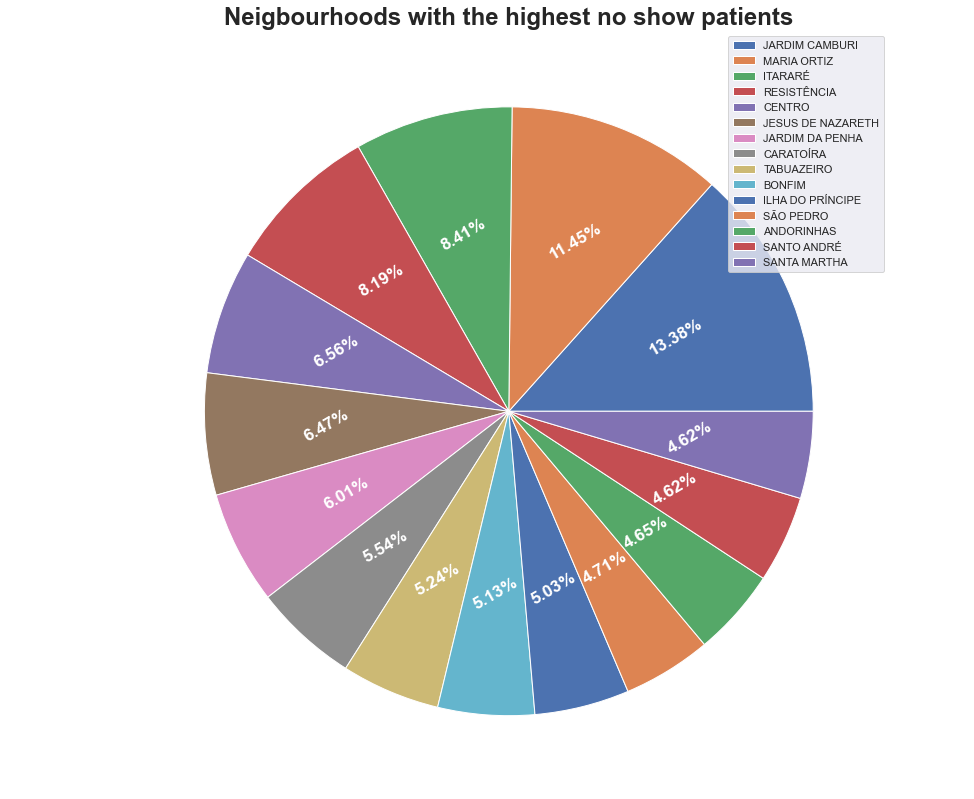

In [53]:
plt.figure(figsize=(20,14))
plt.pie(hood, labels=hood.index, autopct= '%.2f%%',
        textprops= {'size':'x-large',
                    'fontweight': 'bold',
                    'rotation': "30",
                    'color':'w'})
plt.title('Neigbourhoods with the highest no show patients', fontsize = 24, fontweight = 'bold')     
plt.legend()
plt.show()

>JARDIM CAMBURI and MARIA ORTIZ are the neighbourhoods with the highest no-show patients      
ITARARÉ, RESISTÊNCIA, CENTRO, JESUS DE NAZARETH, JARDIM DA PENHA follows both JARDIM CAMBURI and MARIA ORTIZ     

>From the charts we can conclude that both JARDIM CAMBURI and MARIA ORTIZ are the neigbourhoods where the highest number of patients live.

# Gender

In [54]:
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,F,2016-04-29 18:38:08,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,0


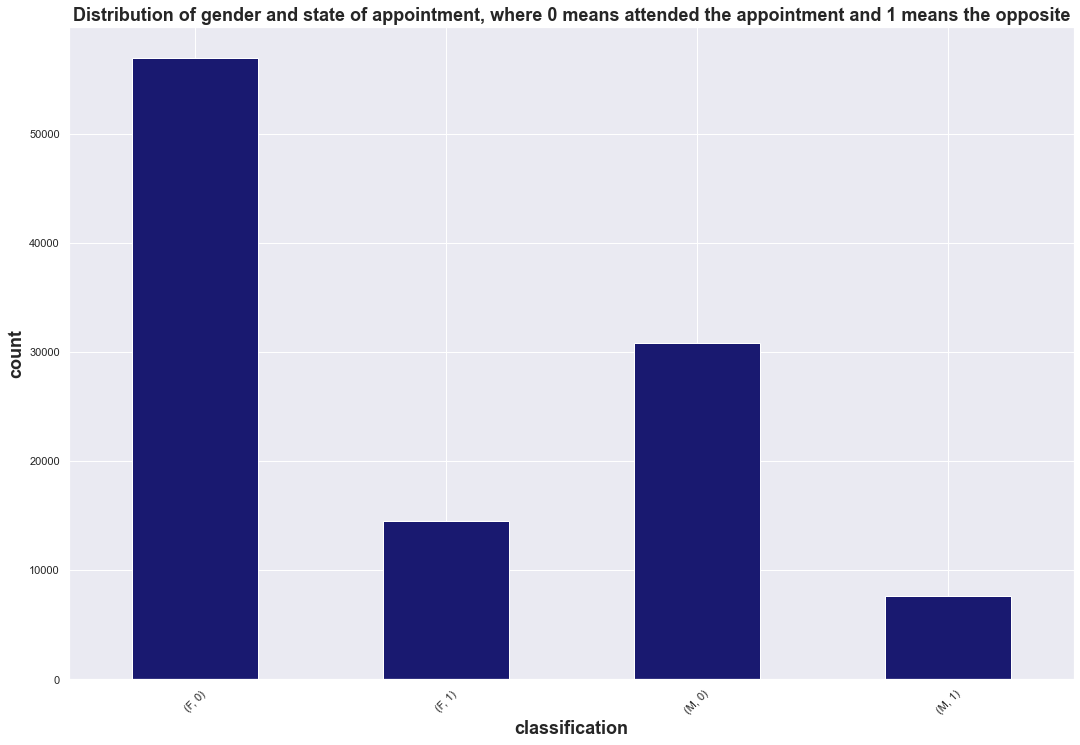

In [179]:
plt.figure(figsize=(18, 12))
df.groupby('gender')['no-show'].value_counts().plot(kind = 'bar',
                                                    color = 'midnightblue')
                                                    
plt.title('Distribution of gender and state of appointment, where 0 means attended the appointment and 1 means the opposite', fontsize = 18, weight = 'bold')
plt.xlabel('classification', fontsize = 18, weight = 'bold')
plt.ylabel('count', fontsize = 18, weight = 'bold')
plt.xticks(rotation = 45)
plt.show();


> It seems that there are way more women in the dataset, so to be sure we will need to investigate the proportions of both genders

In [56]:
df.groupby('gender')['no-show'].value_counts()

gender  no-show
F       0          55562
        1          14137
M       0          29337
        1           7325
Name: no-show, dtype: int64

In [180]:
#calculating the proportion of both genders
prop_women_showed = 55562/(55562+14137)
prop_men_showed = 29337/(29337+7325)

In [181]:
prop_women_showed, prop_men_showed

(0.7971706911146501, 0.8002018438710381)

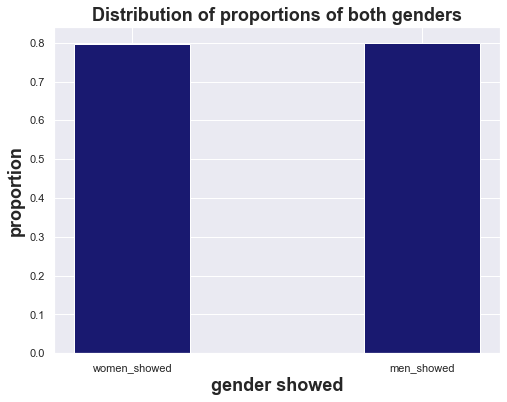

In [182]:
plt.figure(figsize=(8,6))
plt.bar(['women_showed', 'men_showed'], [prop_women_showed, prop_men_showed], width = 0.4, color = 'midnightblue')
plt.title('Distribution of proportions of both genders', fontsize = 18, weight = 'bold')
plt.xlabel('gender showed', fontsize = 18, weight = 'bold')
plt.ylabel('proportion', fontsize = 18, weight = 'bold')
plt.show();

>We can conclude that the percentage of women in the sample is higher than the percentage of men, yet almost the exact same proportion of same genders attended the appointment roughly 0.8

## Appointmentday

In [60]:
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,F,2016-04-29 18:38:08,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,0


In [61]:
showed.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,F,2016-04-29 18:38:08,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29 16:08:27,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29 16:19:04,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29 17:29:31,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29 16:07:23,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,0


In [71]:
day_show = showed.groupby('appointmentday')['no-show'].value_counts().head(15)
day_show.sort_values(ascending = False, inplace = True)
day_show 

appointmentday  no-show
2016-05-11      0          3478
2016-05-16      0          3410
2016-05-12      0          3400
2016-05-02      0          3374
2016-05-09      0          3344
2016-05-18      0          3336
2016-05-05      0          3332
2016-05-03      0          3314
2016-05-17      0          3286
2016-05-10      0          3205
2016-05-04      0          3090
2016-05-06      0          3001
2016-05-13      0          2952
2016-04-29      0          2487
2016-05-14      0            30
Name: no-show, dtype: int64

In [72]:
day_show.to_frame()

,,no-show
appointmentday,no-show,
2016-05-11,0,3478
2016-05-16,0,3410
2016-05-12,0,3400
2016-05-02,0,3374
2016-05-09,0,3344
2016-05-18,0,3336
2016-05-05,0,3332
2016-05-03,0,3314
2016-05-17,0,3286


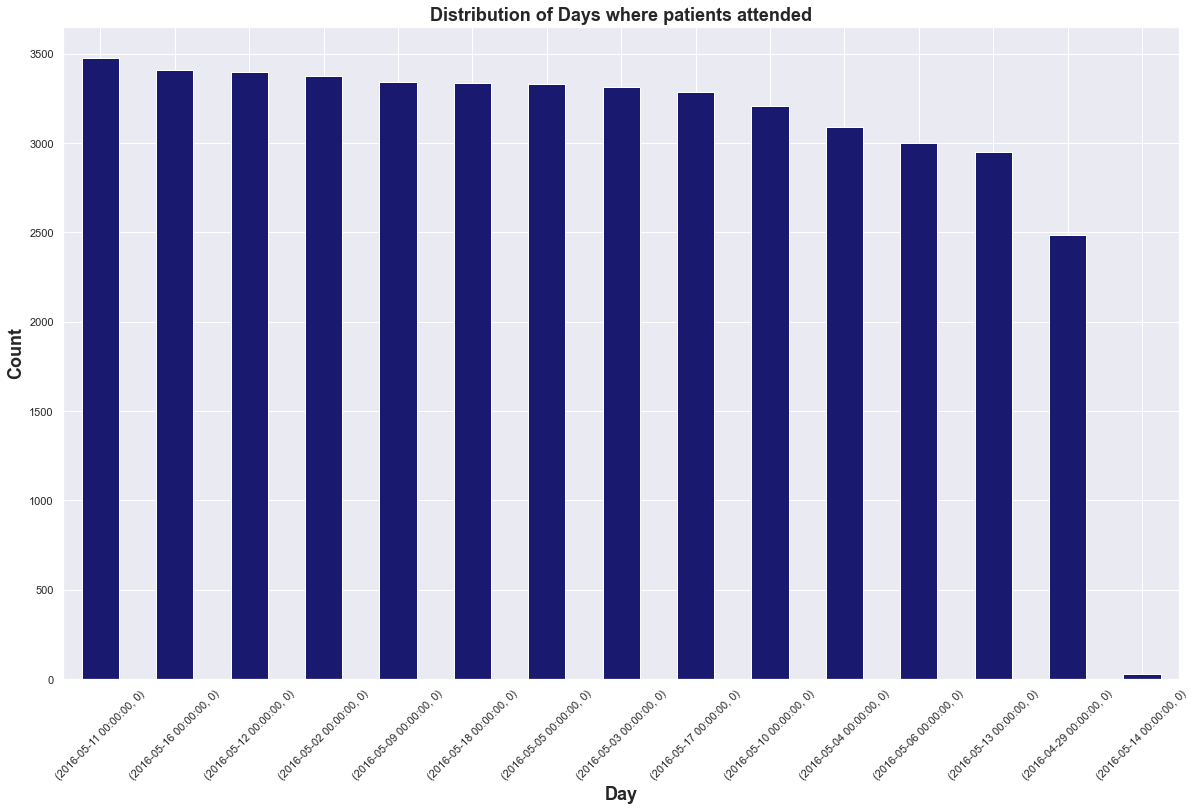

In [77]:
plt.figure(figsize=(20,12))
day_show.plot(kind = 'bar',
              color = 'midnightblue')
plt.title('Distribution of Days where patients attended', fontsize = 18, weight = 'bold')
plt.xlabel('Day', fontsize = 18, weight = 'bold')
plt.ylabel('Count', fontsize = 18, weight = 'bold')
plt.xticks(rotation = 45)
plt.show();

In [183]:
day_no_show = no_show.groupby('appointmentday')['no-show'].value_counts().head(15)
day_no_show.sort_values(ascending = False, inplace = True)
day_no_show 

appointmentday  no-show
2016-05-16      1          982
2016-05-10      1          958
2016-05-09      1          954
2016-05-04      1          939
2016-05-17      1          888
2016-05-13      1          872
2016-05-20      1          862
2016-05-11      1          854
2016-05-30      1          854
2016-05-19      1          846
2016-05-18      1          840
2016-05-02      1          828
2016-05-12      1          814
2016-05-03      1          799
2016-05-24      1          786
2016-05-05      1          775
2016-05-06      1          772
2016-05-25      1          735
2016-04-29      1          601
2016-05-14      1            9
Name: no-show, dtype: int64

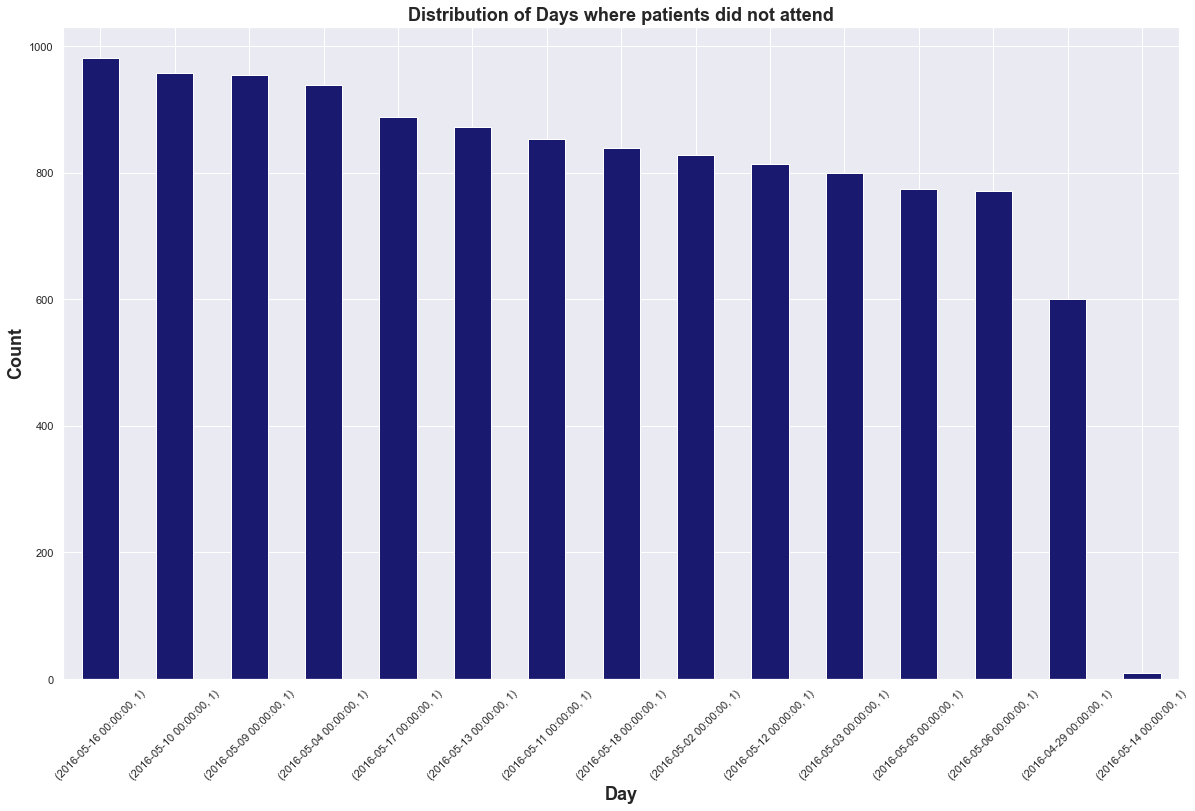

In [78]:
plt.figure(figsize=(20,12))
day_no_show.plot(kind = 'bar',
                 color = 'midnightblue')
              
plt.title('Distribution of Days where patients did not attend', fontsize = 18, weight = 'bold')
plt.xlabel('Day', fontsize = 18, weight = 'bold')
plt.ylabel('Count', fontsize = 18, weight = 'bold')
plt.xticks(rotation = 45)
plt.show();

> We have a distribution of all the days in our dataset, and It seems that day 2016-05-14 was a kind of national holiday in brasil, and most of the appointments were scheduled in May.

# 	scheduledday

In [80]:
df.scheduledday.value_counts()

2016-05-06 07:09:54    23
2016-05-06 07:09:53    23
2016-04-25 17:17:46    22
2016-04-25 17:18:27    22
2016-04-25 17:17:23    19
                       ..
2016-04-18 07:14:16     1
2016-06-02 08:02:40     1
2016-05-06 07:28:41     1
2016-05-04 09:03:03     1
2016-05-24 09:30:50     1
Name: scheduledday, Length: 100307, dtype: int64

In [96]:
schedule_showed = showed['scheduledday'].value_counts().head(20)
schedule_showed

2016-03-29 10:44:23    11
2016-03-29 10:43:41    10
2016-05-20 13:06:03     9
2016-05-06 07:09:54     9
2016-05-25 09:36:45     9
2016-06-02 06:47:42     9
2016-06-03 13:13:04     9
2016-05-09 15:52:40     9
2016-05-04 10:19:32     9
2016-05-03 11:49:20     8
2016-06-08 13:14:59     8
2016-05-09 09:45:16     8
2016-06-08 08:02:25     7
2016-06-01 13:04:20     7
2016-03-30 10:49:04     7
2016-04-18 15:39:02     7
2016-03-17 15:59:53     7
2016-05-06 07:09:53     7
2016-06-08 10:39:44     7
2016-05-13 08:38:50     6
Name: scheduledday, dtype: int64

In [99]:
schedule_showed.sort_values(ascending=False, inplace = True)

In [100]:
schedule_showed

2016-03-29 10:44:23    11
2016-03-29 10:43:41    10
2016-05-09 15:52:40     9
2016-05-04 10:19:32     9
2016-05-20 13:06:03     9
2016-05-06 07:09:54     9
2016-05-25 09:36:45     9
2016-06-02 06:47:42     9
2016-06-03 13:13:04     9
2016-05-03 11:49:20     8
2016-06-08 13:14:59     8
2016-05-09 09:45:16     8
2016-05-06 07:09:53     7
2016-06-08 10:39:44     7
2016-06-08 08:02:25     7
2016-06-01 13:04:20     7
2016-03-30 10:49:04     7
2016-04-18 15:39:02     7
2016-03-17 15:59:53     7
2016-05-13 08:38:50     6
Name: scheduledday, dtype: int64

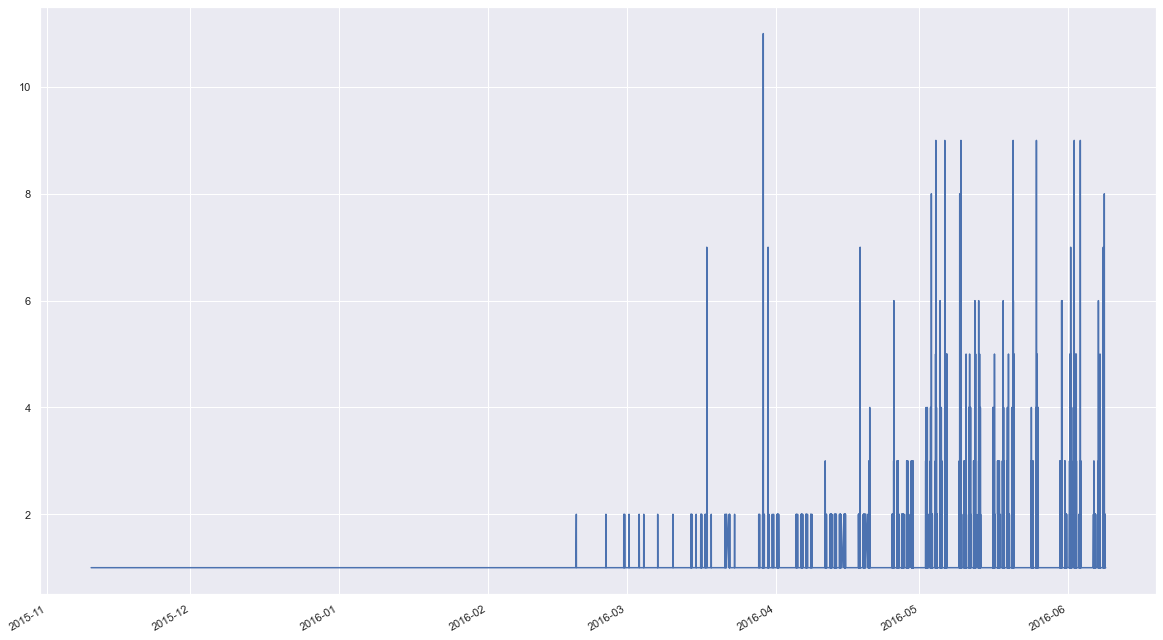

In [101]:
plt.figure(figsize=(20,12))
showed['scheduledday'].value_counts().plot();

In [102]:
schedule_no_showed = no_show['scheduledday'].value_counts().head(20)
schedule_no_showed

2016-04-25 17:17:46    21
2016-04-25 17:18:27    20
2016-04-25 17:17:23    16
2016-05-06 07:09:53    16
2016-05-10 08:18:24    14
2016-05-06 07:09:54    14
2016-05-31 09:54:52    14
2016-04-25 17:19:03    12
2016-05-09 08:07:11    12
2016-05-13 08:54:09    12
2016-05-03 07:52:31    11
2016-05-10 08:29:24    11
2016-05-06 08:04:41    10
2016-05-06 11:08:48    10
2016-05-13 08:47:34    10
2016-06-03 08:51:28     9
2016-05-11 07:47:24     8
2016-05-11 07:46:00     8
2016-03-29 10:38:36     8
2016-06-07 16:15:14     8
Name: scheduledday, dtype: int64

In [103]:
schedule_no_showed.sort_values(ascending=False, inplace = True)

In [104]:
schedule_no_showed

2016-04-25 17:17:46    21
2016-04-25 17:18:27    20
2016-04-25 17:17:23    16
2016-05-06 07:09:53    16
2016-05-10 08:18:24    14
2016-05-06 07:09:54    14
2016-05-31 09:54:52    14
2016-04-25 17:19:03    12
2016-05-09 08:07:11    12
2016-05-13 08:54:09    12
2016-05-10 08:29:24    11
2016-05-03 07:52:31    11
2016-05-06 08:04:41    10
2016-05-06 11:08:48    10
2016-05-13 08:47:34    10
2016-06-03 08:51:28     9
2016-05-11 07:47:24     8
2016-05-11 07:46:00     8
2016-03-29 10:38:36     8
2016-06-07 16:15:14     8
Name: scheduledday, dtype: int64

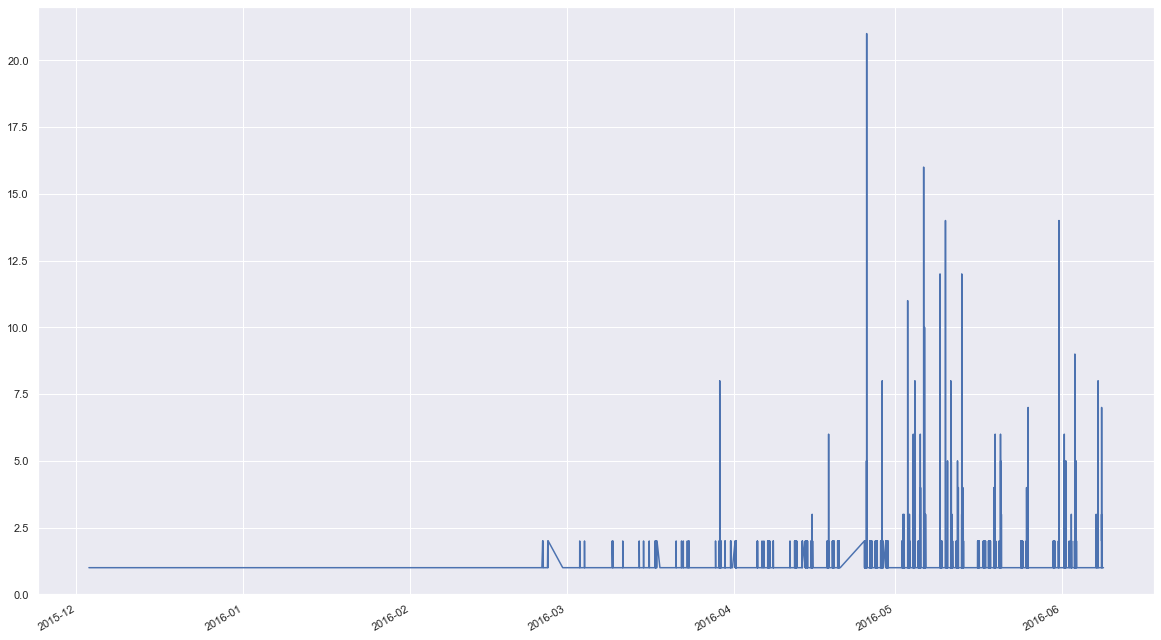

In [105]:
plt.figure(figsize=(20,12))
no_show['scheduledday'].value_counts().plot();

>It seems odd, that there are so many entries scheduled the exact same date, hour, minute and second. 
but from the distribution it seems that almost all our dataset from April and May 2016.

## Did SMS-reminders decrease the proportion of patients not showing up?

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106361 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   gender          106361 non-null  object        
 1   scheduledday    106361 non-null  datetime64[ns]
 2   appointmentday  106361 non-null  datetime64[ns]
 3   age             106361 non-null  float64       
 4   neighbourhood   106361 non-null  object        
 5   scholarship     106361 non-null  int64         
 6   hypertension    106361 non-null  int64         
 7   diabetes        106361 non-null  int64         
 8   alcoholism      106361 non-null  int64         
 9   handicap        106361 non-null  int64         
 10  sms_received    106361 non-null  int64         
 11  no-show         106361 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(7), object(2)
memory usage: 10.5+ MB


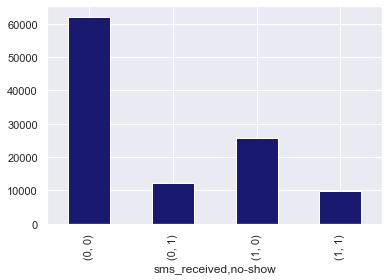

In [185]:
df.groupby('sms_received')['no-show'].value_counts().plot(kind = 'bar',
                                                          color = 'midnightblue');

> Explanation for the graph:

> the code for the highest bar (0,0), the first 0 indicates that the message hasn't been received and the second 0 means the patient has attended the appointment.

In [114]:
df.groupby('sms_received')['no-show'].value_counts()

sms_received  no-show
0             0          59882
              1          11894
1             0          25017
              1           9568
Name: no-show, dtype: int64

### Calculating the proportion of the two classes for better understanding 

In [186]:
prop_received_show_up = 25017/(25017+9568)
prop_not_received_show_up = 59882/(59882+11894)

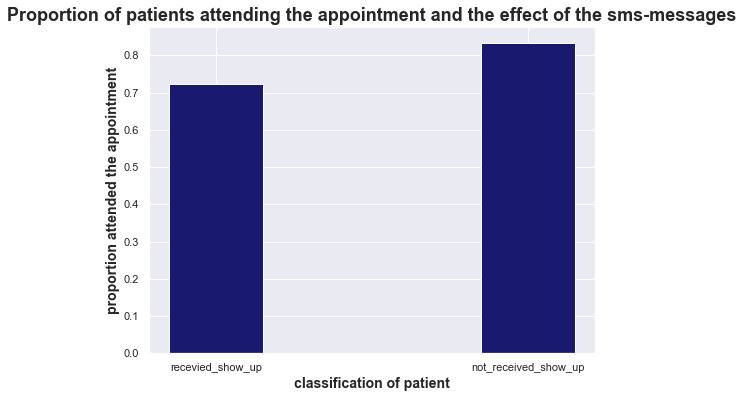

In [187]:
plt.figure(figsize=(8,6))
plt.bar(['recevied_show_up', 'not_received_show_up'],
        [prop_received_show_up, prop_not_received_show_up],
        width= 0.3,
        color = 'midnightblue')
              
plt.title('Proportion of patients attending the appointment and the effect of the sms-messages', fontsize = 18, weight = 'bold')
plt.xlabel('classification of patient', fontsize = 14, weight = 'bold')
plt.ylabel('proportion attended the appointment', fontsize = 14, weight = 'bold')
plt.show();

> We can conclude that the sms-messages have no impact on the decision of attending the appointment, actually the porportion of patients who received a message and attended the appointment is less than the proportion of patients who haven't received the sms-message and do attend the appointment, so it's kind of useless and it seems that the patients don't actually check it.

# Conclusions:

>It seems that there is no such difference in age between both the people who showed up and did not show up, they both follow the same pattern of behaviour, but people who attended the appointment are kind of older.

>Patients who had hypertension are more likely to show up for the appointment.

>Patients who had diabetes are more likely to show up for the appointment.

>Patients who had alcoholism seem to have the same pattern of behaviour, no significane difference.

>Patients who are handicapped are more likely to show up for the appointment.

>If a patient showed up for the appointmont, very likely he'd be from JARDIM CAMBURI or MARIA ORTIZ, 
RESISTÊNCIA, JARDIM DA PENHA, CENTRO, SANTA MARTHA, ITARARÉ follows both JARDIM CAMBURI and MARIA ORTIZ.  

>JARDIM CAMBURI and MARIA ORTIZ are the neighbourhoods with the highest no-show patients      
ITARARÉ, RESISTÊNCIA, CENTRO, JESUS DE NAZARETH, JARDIM DA PENHA follows both JARDIM CAMBURI and MARIA ORTIZ.

>JARDIM CAMBURI and MARIA ORTIZ are the neighbourhoods with the highest no-show patients      
ITARARÉ, RESISTÊNCIA, CENTRO, JESUS DE NAZARETH, JARDIM DA PENHA follows both JARDIM CAMBURI and MARIA ORTIZ 

>From the charts we can conclude that both JARDIM CAMBURI and MARIA ORTIZ are the neigbourhoods where the highest number of patients live.

>It seems that there are way more women in the dataset, so to be sure we will need to investigate the proportions of both genders, but after calculating the proportions of both genders, We can conclude that almost the exact proportion of same genders attended the appointment roughly 0.8.

>We concluded that day 2016-05-14 was a kind of national holiday in brasil, and most of the appointments were scheduled in May.

>We concluded that the sms-messages have no impact on the decision of attending the appointment, actually the porportion of patients who received a message and attended the appointment is less than the proportion of patients who haven't received the sms-message and do attend the appointment, so it's kind of useless and it seems that the patients don't actually check it.